Logistic Regression - Diabetes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
diabetes_train = pd.read_csv('/Users/patrickorourke/Desktop/diabetes-classification/train.csv')
diabetes_test = pd.read_csv('/Users/patrickorourke/Desktop/diabetes-classification/test.csv')
diabetes_train = diabetes_train.T #### Need to transpose the initial dataframe so the input vector is of the form
diabetes_test = diabetes_test.T 
##### (Dimension fo input features, number of training examples)
##print(diabetes_dataset.shape)     #(10, 614)
#X = diabetes_dataset.iloc[[0,1,2,3,4,5,6,7,8], :]
X_train = diabetes_train.iloc[:9,:]  ### (9, 614)
X_test = diabetes_test.iloc[:9,:]  ### (9, 614)
##print(X.shape)


Y_train = diabetes_train.iloc[[9],:] ### (1, 614)
print(Y_train)




training_examples = X_train.shape[0]
test_examples = X_test.shape[0]

m_train = Y_train.shape[1]
m_test = X_test.shape[1]


print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
#print ("Y_test shape: " + str(Y_test.shape))

w = np.zeros((training_examples,1))



b = 0
print(b)

alpha = 0.00001

J = 0

m = X_train.shape[1]
n = X_test.shape[1]

print(m)


a = 0.00003

Y_Prediction = []

#iterations = 1000

          0    1    2    3    4    5    6    7    8    9    ...  604  605  \
diabetes  0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

          606  607  608  609  610  611  612  613  
diabetes  1.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  

[1 rows x 614 columns]
Number of training examples: m_train = 614
Number of testing examples: m_test = 154
X_train shape: (9, 614)
Y_train shape: (1, 614)
X_test shape: (9, 154)
0
614


In [3]:
### Standardize data
#X_test = X_test
#X_train = X_train
#Y_train = Y_train

# Normalize data
X_train = (X_train - np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test = (X_test - np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

In [4]:
class logistic_regression:

    def __init__(self,alpha,iterations):
        self.alpha = alpha
        self.iterations = iterations

    def forward_propagation(self,w,b,X,Y,J):
       # print("Shape of w: ", w.shape)  ### (9, 1)
       # print("Shape of X: ", X.shape)  ### (9, 614)
       # print("Shape of b: ", b)        ### 0
        z = np.dot(w.T,X) + b
        #print(z) # [[0. 0. 0. 0. 0. 0. 0. 0. 0.]]
      #  print("Shape of z: ", z.shape)  ### (1, 614)
        a = 1/(1 + np.exp(-z))
      #  print("Shape of a: ", a.shape)  ### (1, 614)
        assert(a.shape == (1, m))

      #  a = np.squeeze(np.asarray(a))

      #  print("Shape of Y: ", Y.shape)  ### (1, 614)
         

        J = np.sum((np.dot(Y.T,np.log(a)) + np.dot((1 - Y.T),np.log(1 - a)))) * (-1.0 / m)

        assert(J.shape == ())
       # print("J: ", J)
      # print("Shape of J: ", J.shape)  ### (614,)
     #   J = np.squeeze(J)
      #  print("The value of J: ", J)
        ###assert(J.shape == ())
        return a,J 

    def backward_propagation(self,alpha,m,a,X,Y,w,b):    
      #  print("Original Shape of w: ", w.shape)  ### (9,1)
      #  print("Original Shape of b: ", b)        ### 0     
        dz = a - Y     ##### dJ/dz
       # print("Shape of dz: ", dz.shape)         ### (1, 614)
       # print("Shape of X: ", X.shape)           ### (9, 614)
        dw = (1 / m) * (np.dot(X,dz.T))
      #  print("Shape of dw: ", dw.shape)         ### (9, 1) 
        db = (1.0 / m) * (np.sum(dz))
        assert(dw.shape == w.shape)
        assert(db.dtype == float)
        db = db.shape[0]
       # print("Shape of db: ", db)         ### (614,)
        w -= (alpha * dw)
      #  print("Shape of w: ", w.shape)           ### (9, 1) 
        b -= (alpha * db)
       # print("New Shape of b: ", b)       ### (614,)
        return w,b




    def train(self,w,b,X,Y,J,alpha,iterations):

        costs = []

        for i in range(iterations):

            a, J = self.forward_propagation(w,b,X,Y,J)
            w, b = self.backward_propagation(alpha, m, a, X, Y, w, b)

            # Record the costs
            if i % 10 == 0:
                costs.append(J)
                
            # Print the cost every 100 training examples
            if i % 10 == 0:
                print("Cost after iteration %i: %f" % (i, J))
                
        print(w)
        print(b)

        return  w, b, costs
    
    def predict(self,X,w,b):
        # Predict using LEARNED logistic para,eters
        
        Y_prediction = np.zeros((1, X.shape[1]))
        
        print("Y_prediction: ",Y_prediction.shape)
        print("X: ", X.shape)
        print("w: ", w.shape)
        print("b: ", b)
        
        
        z = np.dot(w.T,X) + b
        #print(z)
        a = 1.0/(1 + np.exp(-z))
       # print(a)
        
        
        
        for i in range(X.shape[1]):
            Y_prediction[0, i] = 1 if a[0, i] > 0.5 else 0
            #print(Y_prediction[0, i])
            
        
            
        assert(Y_prediction.shape == (1, X.shape[1]))
            
        return Y_prediction
            
      
    
        
        

In [5]:
ans = logistic_regression(alpha=0.00001,iterations=300)

In [6]:
w_learned, b_learned, costs = ans.train(w,b,X_train,Y_train,J,alpha,iterations=250)


Cost after iteration 0: 425.592369
Cost after iteration 10: 420.170105
Cost after iteration 20: 415.326331
Cost after iteration 30: 411.059366
Cost after iteration 40: 407.366455
Cost after iteration 50: 404.243790
Cost after iteration 60: 401.686536
Cost after iteration 70: 399.688873
Cost after iteration 80: 398.244028
Cost after iteration 90: 397.344334
Cost after iteration 100: 396.981275
Cost after iteration 110: 397.145546
Cost after iteration 120: 397.827118
Cost after iteration 130: 399.015298
Cost after iteration 140: 400.698797
Cost after iteration 150: 402.865799
Cost after iteration 160: 405.504028
Cost after iteration 170: 408.600815
Cost after iteration 180: 412.143170
Cost after iteration 190: 416.117842
Cost after iteration 200: 420.511385
Cost after iteration 210: 425.310219
Cost after iteration 220: 430.500687
Cost after iteration 230: 436.069113
Cost after iteration 240: 442.001849
[[1.74369294e-05]
 [3.75760509e-06]
 [8.12970422e-05]
 [1.98701190e-05]
 [8.08973054e-

In [7]:
print(w_learned)

[[1.74369294e-05]
 [3.75760509e-06]
 [8.12970422e-05]
 [1.98701190e-05]
 [8.08973054e-06]
 [6.43150839e-05]
 [1.62644693e-05]
 [2.68339353e-07]
 [1.62173342e-05]]


In [8]:
print(b_learned)

-1.535000000000005


In [9]:
Y_prediction_train = ans.predict(X_train,w_learned,b_learned)

Y_prediction:  (1, 614)
X:  (9, 614)
w:  (9, 1)
b:  -1.535000000000005


In [10]:
Y_prediction_test = ans.predict(X_test,w_learned,b_learned)

Y_prediction:  (1, 154)
X:  (9, 154)
w:  (9, 1)
b:  -1.535000000000005


In [11]:
print(np.array(Y_train))

[[0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1.
  1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
  1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1.
  1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1.
  0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.
  0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
  1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1.
  1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 

In [12]:
print(Y_prediction_train)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [13]:
print(Y_train)

          0    1    2    3    4    5    6    7    8    9    ...  604  605  \
diabetes  0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

          606  607  608  609  610  611  612  613  
diabetes  1.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  

[1 rows x 614 columns]


In [14]:
#print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - test_labels)) * 100))

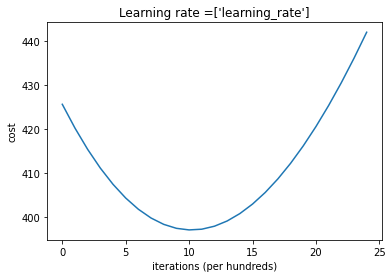

In [15]:
# Plot learning curve (with costs)
#costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(["learning_rate"]))
plt.show()